<a href="https://colab.research.google.com/github/snghx/ITB/blob/main/classification_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📖 Classification Assignment

🙋 소비자경제학과 1913455 노승혜

----
✏️ 목표 : 혈압 데이터를 분류해보고, 혈압에 영향을 미치는 요인들을 살펴보고자 한다.

#### 01. 💻 데이터 전처리 및 파생변수 생성

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq             

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                           

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") 
#nanum_font

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/

In [ ]:
%matplotlib inline
import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm  

mpl.rcParams['axes.unicode_minus'] = False  

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()  # 폰트 적용

NanumMyeongjo


In [ ]:
fpath = 'https://raw.githubusercontent.com/snghx/ITB/main/data/health_data.csv'
health_row = pd.read_csv(fpath, index_col = '가입자일련번호')

print(health_row.isnull().sum())  #결측치 확인

기준년도              0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [ ]:
# 사용할 데이터만 추출
features = health_row.columns.difference(['기준년도', '시도코드', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '구강검진수검여부', '데이터공개일자'])
health = health_row[features]

In [ ]:
# 결측치 처리

# 1. 결측치 제거
health_d = health.dropna(axis=0)
print(health_d.info()) #총 1249개의 데이터
# 데이터 개수가 너무 적어져서  결측치 대체로 진행


# 2. 결측치 평균으로 대체 (결측치 많은 변수만)
health_m = health.copy()
health_m.fillna({'총콜레스테롤':int(health_m['총콜레스테롤'].mean())}, inplace = True)
health_m.fillna({'트리글리세라이드':int(health_m['트리글리세라이드'].mean())}, inplace = True)
health_m.fillna({'HDL콜레스테롤':int(health_m['HDL콜레스테롤'].mean())}, inplace = True)
health_m.fillna({'LDL콜레스테롤':int(health_m['LDL콜레스테롤'].mean())}, inplace = True)
health_m.fillna({'치아우식증유무':int(health_m['치아우식증유무'].mean())}, inplace = True)
health_m.fillna({'치석':int(health_m['치석'].mean())}, inplace = True)

health_m = health_m.dropna(axis=0)
print("="*60)
print(health_m.info()) #총 9858개의 데이터

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 7 to 9975
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (혈청지오티)ALT   1249 non-null   float64
 1   (혈청지오티)AST   1249 non-null   float64
 2   HDL콜레스테롤     1249 non-null   float64
 3   LDL콜레스테롤     1249 non-null   float64
 4   감마지티피        1249 non-null   float64
 5   성별코드         1249 non-null   object 
 6   수축기혈압        1249 non-null   float64
 7   식전혈당(공복혈당)   1249 non-null   float64
 8   신장(5Cm단위)    1249 non-null   int64  
 9   연령대코드(5세단위)  1249 non-null   int64  
 10  요단백          1249 non-null   float64
 11  음주여부         1249 non-null   object 
 12  이완기혈압        1249 non-null   float64
 13  체중(5Kg 단위)   1249 non-null   int64  
 14  총콜레스테롤       1249 non-null   float64
 15  치석           1249 non-null   float64
 16  치아우식증유무      1249 non-null   float64
 17  트리글리세라이드     1249 non-null   float64
 18  혈색소          1249 non-null   float64
 19  혈청크레아티

In [ ]:
health_m.rename(columns={'신장(5Cm단위)': '신장', '체중(5Kg 단위)': '체중','연령대코드(5세단위)' : '연령대'}, inplace=True)

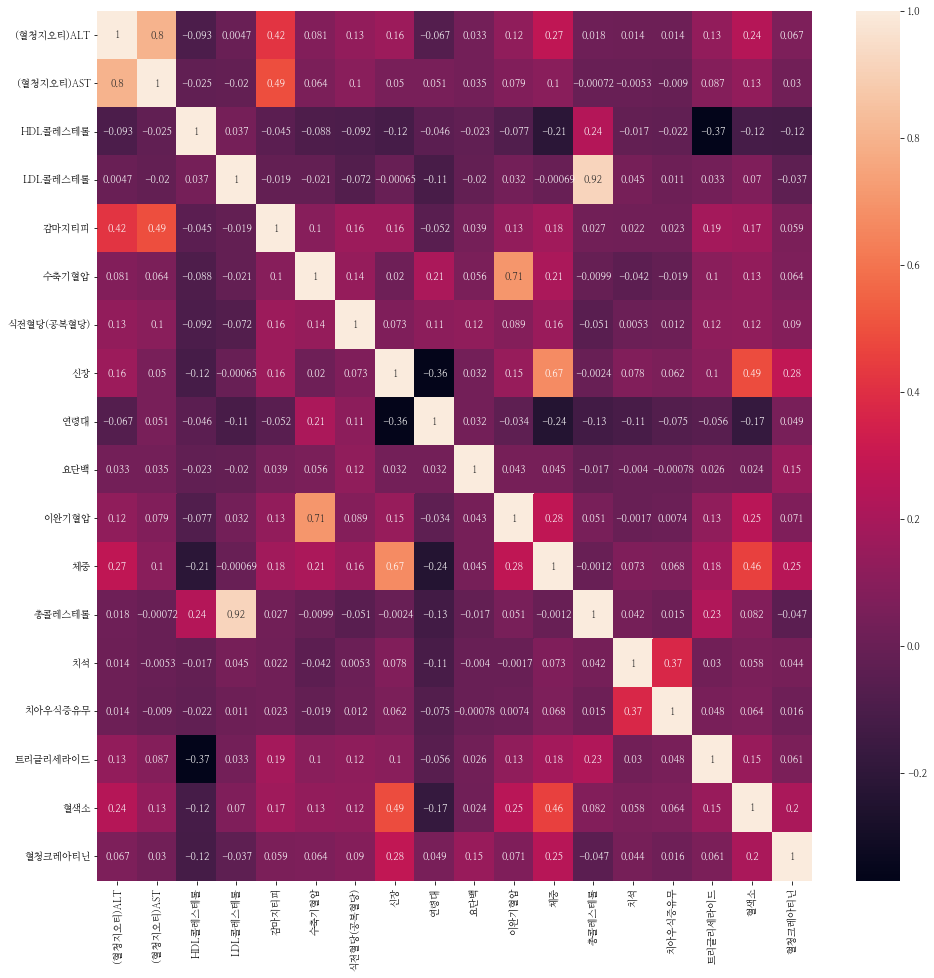

수축기혈압         1.000000
이완기혈압         0.705288
연령대           0.213247
체중            0.212663
식전혈당(공복혈당)    0.140613
혈색소           0.132685
트리글리세라이드      0.102596
감마지티피         0.101035
(혈청지오티)ALT    0.081217
혈청크레아티닌       0.064135
(혈청지오티)AST    0.063595
요단백           0.056477
신장            0.020462
총콜레스테롤       -0.009916
치아우식증유무      -0.019238
LDL콜레스테롤     -0.021331
치석           -0.041550
HDL콜레스테롤     -0.088208
Name: 수축기혈압, dtype: float64
이완기혈압         1.000000
수축기혈압         0.705288
체중            0.277144
혈색소           0.252637
신장            0.147863
감마지티피         0.132928
트리글리세라이드      0.127015
(혈청지오티)ALT    0.123147
식전혈당(공복혈당)    0.088577
(혈청지오티)AST    0.079135
혈청크레아티닌       0.071247
총콜레스테롤        0.051250
요단백           0.042805
LDL콜레스테롤      0.032202
치아우식증유무       0.007409
치석           -0.001675
연령대          -0.033802
HDL콜레스테롤     -0.076711
Name: 이완기혈압, dtype: float64


In [ ]:
plt.figure(figsize = (16,16))
sns.heatmap(health_m.corr(), annot = True)
plt.show()

print(health_m.corr()['수축기혈압'].sort_values(ascending = False))
print("="*60)
print(health_m.corr()['이완기혈압'].sort_values(ascending = False))

혈압을 측정하는데 사용되는 수축기혈압과 이완기혈압을 중심으로 살펴보면,

혈색소, 트리글리세라이드, 체중, 식전혈당, 감마지티피, 혈정치오티 AST, ALT와 약한 상관관계를 가지고 있음을 확인할 수 있다.

즉, 빈혈, 이상지질혈증, 체중, 당뇨, 간염과 혈압과의 상관관계가 있음을 파악했다.

In [ ]:
# 연령대 10세 기준으로 수정
health_m.loc[ (health_m['연령대'] == 1) | (health_m['연령대'] ==2), '연령대'] = 0
health_m.loc[ (health_m['연령대'] == 3) | (health_m['연령대'] ==4), '연령대'] = 10
health_m.loc[ (health_m['연령대'] == 5) | (health_m['연령대'] ==6), '연령대'] = 20
health_m.loc[ (health_m['연령대'] == 7) | (health_m['연령대'] ==8), '연령대'] = 30
health_m.loc[ (health_m['연령대'] == 9) | (health_m['연령대'] ==10), '연령대'] = 40
health_m.loc[ (health_m['연령대'] == 11) | (health_m['연령대'] ==12), '연령대'] = 50
health_m.loc[ (health_m['연령대'] == 13) | (health_m['연령대'] ==14), '연령대'] = 60
health_m.loc[ (health_m['연령대'] == 15) | (health_m['연령대'] ==16), '연령대'] = 70
health_m.loc[ (health_m['연령대'] == 17) | (health_m['연령대'] ==18), '연령대'] = 80

In [ ]:
# BMI 지수 column 생성
health_m['BMI'] = health_m['체중'] / (health_m['신장'] *  health_m['신장']) * 10000

In [ ]:
# BMI 지수 범주화

health_m.loc[ (health_m['BMI'] <= 18.5), 'BMI'] = 0
health_m.loc[ (health_m['BMI'] > 18.5) & (health_m['BMI'] <= 22.9), 'BMI'] = 1
health_m.loc[ (health_m['BMI'] > 23.0) & (health_m['BMI'] <= 24.9), 'BMI'] = 2
health_m.loc[ (health_m['BMI'] > 25.0), 'BMI'] = 3


# health_m = health_m.astype({ 'BMI' : 'object' })

# health_m.loc[ (health_m['BMI'] == 0.0), 'BMI'] = 'underweight'
# health_m.loc[ (health_m['BMI'] == 1.0), 'BMI'] = 'normal'
# health_m.loc[ (health_m['BMI'] == 2.0), 'BMI'] = 'overweight'
# health_m.loc[ (health_m['BMI'] == 3.0), 'BMI'] = 'obesity'

In [ ]:
# 혈압 범주화

health_m.loc[ (health_m['수축기혈압'] <= 139) | (health_m['이완기혈압'] <= 89), '혈압'] = 0  #정상
health_m.loc[ (health_m['수축기혈압'] >= 140) | (health_m['이완기혈압'] >= 90), '혈압'] = 1  #고혈압

In [ ]:
# health_m = health_m.astype({ '혈압' : 'object' })

# health_m.loc[ (health_m['혈압'] == 0.0), '혈압'] = 'highbp_bef'
# health_m.loc[ (health_m['혈압'] == 1.0), '혈압'] = 'hightbp1'
# health_m.loc[ (health_m['혈압'] == 2.0), '혈압'] = 'highbp2'
# health_m.loc[ (health_m['혈압'] == 3.0), '혈압'] = 'normal'

In [ ]:
# 혈당 범주화

health_m.loc[ health_m['식전혈당(공복혈당)'] >= 126, '당뇨'] = 1 # 당뇨 있음
health_m.loc[ health_m['식전혈당(공복혈당)'] < 126, '당뇨'] = 0  # 당뇨 없음

In [ ]:
# 빈혈 범주화

health_m.loc[ (health_m['혈색소'] < 13) & (health_m['성별코드'] == "M"), '빈혈'] = 1 # 빈혈 있음
health_m.loc[ (health_m['혈색소'] < 12) & (health_m['성별코드'] == "F"), '빈혈'] = 1 # 빈혈 있음
health_m.loc[ (health_m['혈색소'] >= 13) & (health_m['성별코드'] == "M"), '빈혈'] = 0 # 빈혈 없음
health_m.loc[ (health_m['혈색소'] >= 12) & (health_m['성별코드'] == "F"), '빈혈'] = 0 # 빈혈 없음

In [ ]:
# 요단백 범주화

health_m.loc[ (health_m['요단백'] == 1) | (health_m['요단백'] == 2), '단백뇨'] = 0 # 단백뇨(요단백) 없음
health_m.loc[ (health_m['요단백'] == 3) | (health_m['요단백'] == 4) | (health_m['요단백'] == 5) | (health_m['요단백'] == 6), '단백뇨'] = 1 # 단백뇨(요단백) 있음

In [ ]:
# 혈정크레아티닌 범주화

health_m.loc[ (health_m['혈청크레아티닌'] >= 0.8) | (health_m['혈청크레아티닌'] <= 1.7), '크레아티닌'] = 0   # 이상 없음
health_m.loc[ (health_m['혈청크레아티닌'] > 1.7), '크레아티닌'] = 1   # 이상 있음

In [ ]:
# 간염 범주화

health_m.loc[ (health_m['(혈청지오티)ALT'] >= 0) | (health_m['(혈청지오티)ALT'] <= 40) | (health_m['(혈청지오티)AST'] >= 0) | (health_m['(혈청지오티)AST'] <= 40) ,'간염'] = 0  #간염 없음
health_m.loc[ (health_m['(혈청지오티)ALT'] > 40) | (health_m['(혈청지오티)AST'] > 40) ,'간염'] = 1  #간염 있음

In [ ]:
# # 감마지티피 범주화

# health_m.loc[ (health_m['성별코드'] == "M") | (health_m['감마지티피'] >= 11) | (health_m['감마지티피'] <= 63), '감마'] = 0  # 정상 범주
# health_m.loc[ (health_m['성별코드'] == "F") | (health_m['감마지티피'] >= 8) | (health_m['감마지티피'] <= 35), '감마'] = 0  # 정상 범주
# health_m.loc[ (health_m['성별코드'] == "M") | (health_m['감마지티피'] < 11) | (health_m['감마지티피'] > 63), '감마'] = 1  # 정상 범주 아님
# health_m.loc[ (health_m['성별코드'] == "F") | (health_m['감마지티피'] < 8) | (health_m['감마지티피'] > 35), '감마'] = 1  # 정상 범주 아님

In [ ]:
# health_m = health_m.astype({ '감마' : 'object' })

# health_m.loc[ (health_m['감마'] == 0.0), '감마'] = 'normal'
# health_m.loc[ (health_m['감마'] == 1.0), '감마'] = 'abnormal'

In [ ]:
# 이상지질혈증 범주화

# 이상지질혈증 있음
health_m.loc[ (health_m['총콜레스테롤'] >= 240) | (health_m['트리글리세라이드'] >= 200) | (health_m['HDL콜레스테롤'] < 40) | (health_m['LDL콜레스테롤'] >= 160), '이상지질혈증'] = 1
# 이상지질혈증 없음
health_m.loc[ (health_m['총콜레스테롤'] < 240) | (health_m['트리글리세라이드'] < 200) | (health_m['HDL콜레스테롤'] >= 40) | (health_m['LDL콜레스테롤'] < 160), '이상지질혈증'] = 0

In [ ]:
health_m.columns

Index(['(혈청지오티)ALT', '(혈청지오티)AST', 'HDL콜레스테롤', 'LDL콜레스테롤', '감마지티피', '성별코드',
       '수축기혈압', '식전혈당(공복혈당)', '신장', '연령대', '요단백', '음주여부', '이완기혈압', '체중',
       '총콜레스테롤', '치석', '치아우식증유무', '트리글리세라이드', '혈색소', '혈청크레아티닌', '흡연상태', 'BMI',
       '혈압', '당뇨', '빈혈', '단백뇨', '크레아티닌', '간염', '이상지질혈증'],
      dtype='object')

In [ ]:
# 필요없는 열 삭제
health_m = health_m.drop(['(혈청지오티)ALT', '(혈청지오티)AST', 'HDL콜레스테롤', 'LDL콜레스테롤', '감마지티피','수축기혈압', '식전혈당(공복혈당)','요단백','이완기혈압', '체중',
       '총콜레스테롤','트리글리세라이드', '혈색소', '혈청크레아티닌', '신장'], axis = 1)

In [ ]:
health_m.rename(columns={'단백뇨': '요단백', '크레아티닌': '혈청크레아티닌'}, inplace=True)

In [ ]:
health_m.columns

Index(['성별코드', '연령대', '음주여부', '치석', '치아우식증유무', '흡연상태', 'BMI', '혈압', '당뇨', '빈혈',
       '요단백', '혈청크레아티닌', '간염', '이상지질혈증'],
      dtype='object')

In [ ]:
# 성별코드, 음주여부, 흡연상태 int형으로 변환

health_m.loc[ (health_m['성별코드'] == "M"), '성별코드'] = 0
health_m.loc[ (health_m['성별코드'] == "F"), '성별코드'] = 1

health_m.loc[ (health_m['음주여부'] == "No"), '음주여부'] = 0
health_m.loc[ (health_m['음주여부'] == "Yes"), '음주여부'] = 1

health_m.loc[ (health_m['흡연상태'] == "No"), '흡연상태'] = 0
health_m.loc[ (health_m['흡연상태'] == "NotNow"), '흡연상태'] = 1
health_m.loc[ (health_m['흡연상태'] == "Yes"), '흡연상태'] = 2

health_m = health_m.apply(pd.to_numeric)

#### 📊 분류모델 선택

In [ ]:
health_m.head()

,성별코드,연령대,음주여부,치석,치아우식증유무,흡연상태,BMI,혈압,당뇨,빈혈,요단백,혈청크레아티닌,간염,이상지질혈증
가입자일련번호,,,,,,,,,,,,,,
1,0,40,0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,60,0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,50,0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,60,0,0.0,0.0,0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1,50,0,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 🌳Decision Tree + Random Forest

🌲 Decision Tree Model

In [ ]:
# 의사결정나무 모델 생성 및 학습

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 독립, 종속 변수 분할
X = health_m.drop(['혈압'],axis = 1)
y = health_m['혈압']

# train, test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  #모델 생성
tree.fit(X_train, y_train)

print("train data accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("test data accuracy: {:.3f}".format(tree.score(X_test, y_test)))

train data accuracy: 0.862
test data accuracy: 0.814


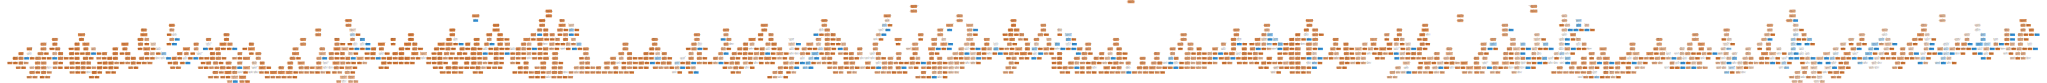

In [ ]:
# 의사결정나무 그래프 생성

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=['정상', '고혈압'],
                feature_names=health_m.columns[1:], impurity=False, filled=True) #max_depth = 4로 설정한 의사결정나무의 그래프

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
# 예측

y_pred_dt = tree.predict(X_test)

In [ ]:
# 변수별 중요도 보여주는 함수

def show_importance(model, title):
  importance = model.feature_importances_
  feature = X_train.columns
  importances = pd.DataFrame()
  importances['feature'] = feature
  importances['importances'] = importance
  importances.sort_values('importances', ascending=False, inplace=True)
  importances.reset_index(drop=True, inplace=True)
  
  plt.figure(figsize=(10, 8))
  sns.barplot(x='importances', y='feature', data=importances)
  plt.title(title, fontsize=18)
  plt.show()

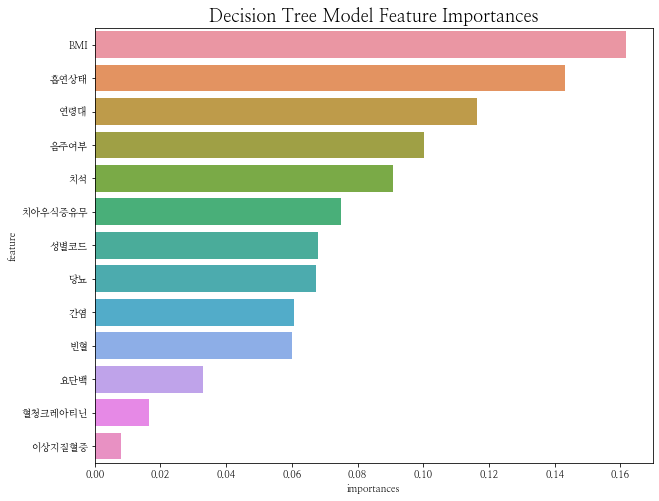

In [ ]:
show_importance(tree, "Decision Tree Model Feature Importances")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE값 보여주는 함수
def show_rmse(y_pred):
  rmse = mean_squared_error(y_test,y_pred) **0.5
  return rmse

🌲 Random Forest

In [ ]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(rf.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(rf.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.862
시험용 데이터 세트 정확도: 0.820


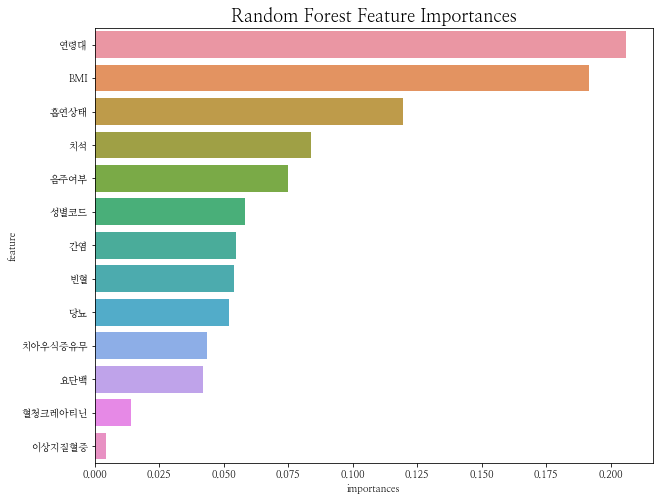

In [ ]:
show_importance(rf,"Random Forest Feature Importances")

In [ ]:
# Decision Tree vs Random Forest 비교

y_pred_rf = rf.predict(X_test)

dt_a = tree.score(X_test, y_test)
rf_a = rf.score(X_test, y_test)

print("Random Forest RMSE :", show_rmse(y_pred_rf))
print("Desicion Tree RMSE :", show_rmse(y_pred_dt))
print("="*50)
print("Decision Tree accuarcy : " ,dt_a)
print("Random Forest accuarcy : " ,rf_a)

Random Forest RMSE : 0.4239292680869897
Desicion Tree RMSE : 0.43151697133684574
Decision Tree accuarcy :  0.8137931034482758
Random Forest accuarcy :  0.8202839756592292


📝 Decision Tree vs Random Forest 비교 결과

----
1. RMSE 비교
```
Random Forest RMSE : 0.4239292680869897
Desicion Tree RMSE : 0.43151697133684574

2. 정확도 비교
```
Decision Tree accuarcy :  0.8137931034482758
Random Forest accuarcy :  0.8202839756592292
```
3. 10-fold로 정확도 비교 (교차검증)

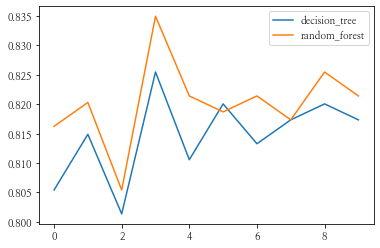

In [ ]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

10번의 교차 검증 수행 중 5번째 경우를 제외하고는 Random Forest의 정확도가 모두 높음

----
따라서 RMSE값에는 큰 차이를 보이지 않고, 교차검증 결과 정확도가 Random Forest가 뛰어나기 때문에 Random Forest를 가지고 최적의 분류 모델 선택 진행

##### 🎢 XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings(action='ignore') # Warning 숨기기

xg = XGBClassifier()
xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

grid_search_xg = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10 )
grid_search_xg.fit(X_train, y_train )
best_xg = grid_search_xg.best_estimator_
best_xg

XGBClassifier(gamma=0.5, learning_rate=0.01, max_depth=6, n_estimators=12,
              random_state=99)

best hyper parameter가 아래와 같이 도출됨
```
XGBClassifier(gamma=0.5, learning_rate=0.01, max_depth=6, n_estimators=12, random_state=99)
```

In [ ]:
# 모델 적용

xgb = XGBClassifier(gamma=0.5, learning_rate=0.01, max_depth=6, n_estimators=12, random_state=99)
xgb.fit(X_train, y_train)

XGBClassifier(gamma=0.5, learning_rate=0.01, max_depth=6, n_estimators=12,
              random_state=99)

In [ ]:
# 예측
from sklearn.metrics import accuracy_score

y_pred_xgb = xgb.predict(X_test)
print("XGBoost RMSE :", show_rmse(y_pred_xgb))

XGBoost RMSE : 0.408331091050956


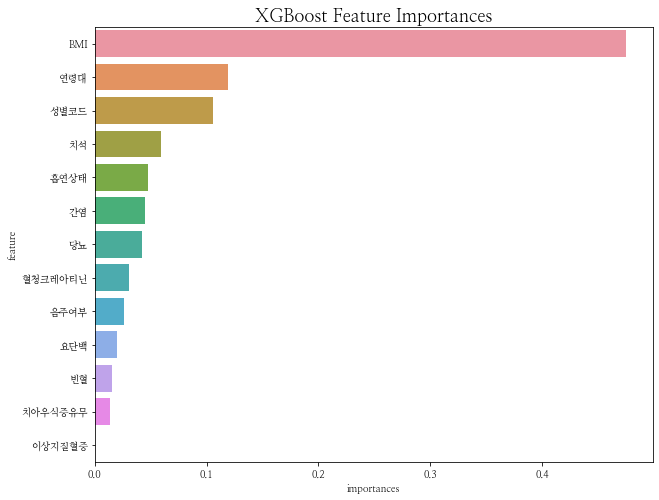

In [ ]:
show_importance(xgb, "XGBoost Feature Importances")

##### 📈 Linear Regression

In [ ]:
# 모델 정의 및 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측

y_pred_lr = lr.predict(X_test)
print("RMSE : ",show_rmse(y_pred_lr))
score = lr.score(X_test, y_test)
print(score)

RMSE :  0.36604483646142727
0.033711670784806524


#### 👏 최적의 분류 모델 선택

----
cross validation 사용

1. R <sup>2</sup> 으로 모델 비교

In [ ]:
rf_r2 = cross_val_score(rf, X_train, y_train, cv=10, scoring='r2')
xgb_r2 = cross_val_score(xgb, X_train, y_train, cv=10, scoring='r2')
lr_r2 = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')

print("< R^2 >") 
print("Random forest: ", rf_r2) 
print("XGBooster: ", xgb_r2)
print("Linear Regression: ", lr_r2)
print("=" * 80)
print("< R^2 mean >")
print("Random forest :{:.3f}".format(rf_r2.mean())) 
print("XGBoost :{:.3f}".format(xgb_r2.mean())) 
print("Linear Regression :{:.3f}".format(lr_r2.mean())) 

< R^2 >
Random forest:  [-0.32611245 -0.29685997 -0.40411907 -0.18992187 -0.28745645 -0.30696336
 -0.28745645 -0.31671682 -0.26645322 -0.29590562]
XGBooster:  [-0.24810584 -0.1993517  -0.24810584 -0.23868916 -0.25819607 -0.20942878
 -0.31671682 -0.2289357  -0.23700082 -0.19773096]
Linear Regression:  [0.03653352 0.01035067 0.03164841 0.01645406 0.03582406 0.02200015
 0.00186654 0.00818431 0.03815895 0.03283094]
< R^2 mean >
Random forest :-0.298
XGBoost :-0.238
Linear Regression :0.023


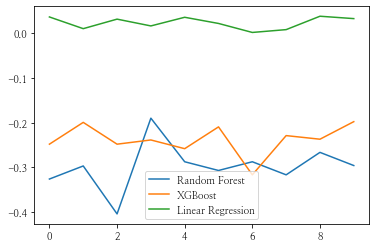

In [ ]:
# R^2 으로 모델 비교
cv_list = [
    ['Random Forest',rf_r2],
    ['XGBoost',xgb_r2],
    ['Linear Regression',lr_r2],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

2. RMSE로 모델 비교

In [ ]:
rf_rmse = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
xgb_rmse = cross_val_score(xgb, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
lr_rmse = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

rf_rmse = np.sqrt(-rf_rmse)
xgb_rmse = np.sqrt(-xgb_rmse)
lr_rmse = np.sqrt(-lr_rmse)

print("< RMSE >") 
print("Random forest: ", rf_rmse) 
print("XGBooster: ", xgb_rmse)
print("Linear Regression: ", lr_rmse)
print("=" * 80)
print("< RMSE mean >")
print("Random forest :{:.3f}".format(rf_rmse.mean())) 
print("XGBoost :{:.3f}".format(xgb_rmse.mean())) 
print("Linear Regression :{:.3f}".format(lr_rmse.mean())) 

< RMSE >
Random forest:  [0.42870011 0.42394543 0.44112877 0.40631017 0.42263431 0.42582404
 0.42263431 0.42740999 0.41780404 0.42263431]
XGBooster:  [0.4159002  0.40769623 0.4159002  0.4145526  0.41780404 0.40962705
 0.42740999 0.41291728 0.41291728 0.40631017]
Linear Regression:  [0.3757728  0.36545022 0.36752426 0.3543188  0.36334621 0.35331841
 0.39881308 0.38701659 0.36530038 0.34060728]
< RMSE mean >
Random forest :0.424
XGBoost :0.414
Linear Regression :0.367


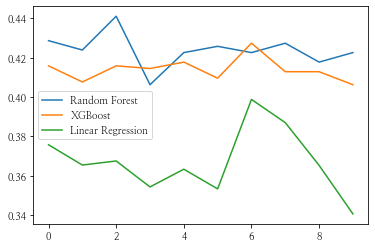

In [ ]:
# RMSE로 모델 비교
cv_list = [
    ['Random Forest',rf_rmse],
    ['XGBoost',xgb_rmse],
    ['Linear Regression',lr_rmse],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

📝 최적의 분류 모델 선택 결과

---
1. R<sup>2</sup>
```
< mean >
Random forest :-0.298
XGBoost :-0.238
Linear Regression :0.023
```

2. RMSE
```
< mean >
Random forest :0.424
XGBoost :0.414
Linear Regression :0.367
```

첫번째로 Linear Regression, 두번째로 XGBoost, 마지막으로 Random Forest의 성능이 좋음을 볼 수 있다.

#### 👀 Insight 도출

Text(0.5, 1.0, 'Lineaer Regression Feature Importances')

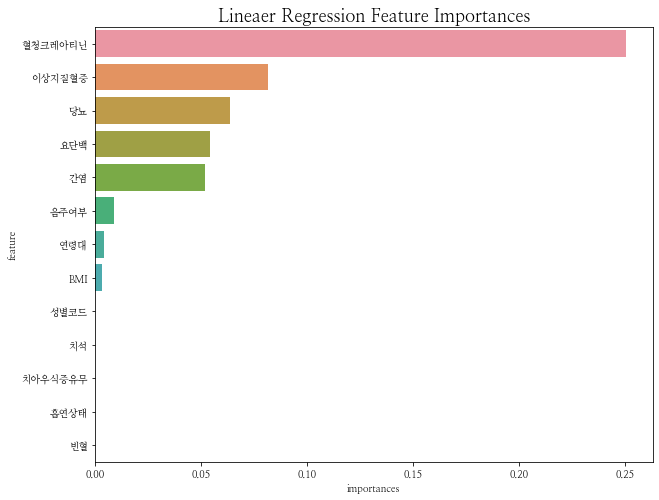

In [ ]:
importance_lr = lr.coef_
feature = X_train.columns
importances_lr = pd.DataFrame()
importances_lr['feature'] = feature
importances_lr['importances'] = importance_lr
importances_lr.loc[importances_lr['importances'] < 0, 'importances'] = 0 # 음수는 제외

importances_lr.sort_values('importances', ascending=False, inplace=True)
importances_lr.reset_index(drop=True, inplace=True)
  
plt.figure(figsize=(10, 8))
sns.barplot(x='importances', y='feature', data=importances_lr)
plt.title("Lineaer Regression Feature Importances", fontsize=18)

**📢 중요 변수 설명**

위 그래프에서 나온 결과와 데이터 전처리 과정에서 heatmap을 통해 살펴본 결과가 유사성을 보이고 있다는 점이 흥미롭다.  

----
1️⃣ Linear Regression Feature Importances에서는 혈청크레아티닌의 중요도가 제일 높게 나왔다. heatmap에서도 혈압(수축기혈압, 이완기혈압)과 혈청크레아티닌과의 상관관계가 비교적 높게 나왔다.

2️⃣ 이상지질혈증의 중요도는 두번째로 높게 나왔다. 트리글리세라이드, 총콜레스테롤, HDL콜레스테롤, LDL콜레스테롤은 이상지질혈증을 판단하는 요인으로, heatmap에서 트리글리세라이드와 혈압과의 상관관계가 비교적 높게 나왔다.

3️⃣ 당뇨의 중요도도 높게 나타났다. heatmap에서도 당뇨를 판단하는 식전혈당(공복혈당)의 상관관게 계수가 비교적 높게 나왔다.

4️⃣ 요단백의 중요도도 높게 나타났다. heatmap에서도 요단백의 상관관계 계수가 비교적 높게 나왔다.

5️⃣ 간염의 중요도도 높게 나타났다. heatmap에서도 간염을 판단하는 (혈정치오티)AST와 (혈정치오티)ALT의 상관관계가 비교적 높게 나왔다.

---
Linear Regression의 Feature Importances 그래프를 통해 heatmap을 통해 살펴본 변수들 간의 상관관계와 분석 결과가 일치함을 확인할 수 있다.   


위의 시사점을 가지고, 혈압과 상관관계가 있고, 공통적으로 영향을 미치는 요인으로 혈청크레아티닌, 이상지질혈증, 당뇨, 요단백, 간염 5개의 요인들이 있음을 확인할 수 있다. 
또한 음주여부와 연령대, BMI 역시 혈압에 중요한 영향을 미침을 볼 수 있다.

---
그러나, feature_importances는 어떤 feature의 값이 랜덤 분포될 경우, 성능이 얼마나 떨어지는지를 보여주기 때문에 종속변수에 미치는 영향력의 방향성을 유추할 수 없다는 단점이 있다.

이를 보완하기 위해 영향에 대한 방향성(positive or negative)을 알려주는 shap value를 추출하여 시각화해보고자 한다.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 15.5 MB/s 


In [ ]:
#!pip install shap
#import skimage
#!pip install --upgrade scikit-image
import shap

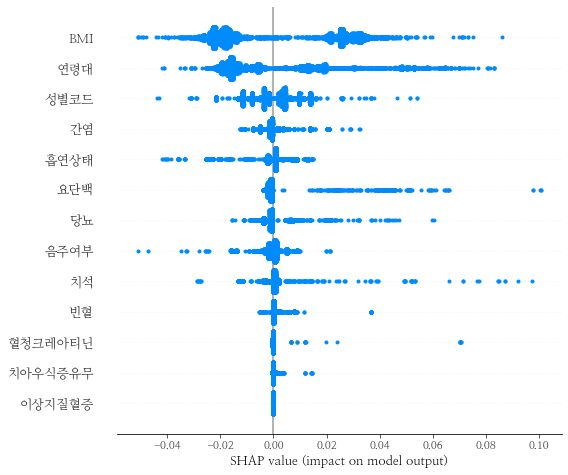

In [ ]:
shap.initjs() #그래프 초기화
explainer = shap.TreeExplainer(xgb, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train.columns)

아쉽게도 성능이 가장 좋게 나온 Linear Regression을 shap함수 안에 적용할 수가 없어서 두번째로 성능이 좋게 나온 XGBoost를 가지고 진행했다.

---

1️⃣ BMI와 연령대가 고혈압에 긍정적인 영향을 미친다.  
즉, 체질량 지수(비만도)가 높고, 연령대가 높을수록 고혈압에 걸릴 확률이 높음을 의미한다.


2️⃣ 성별이 높을수록 고혈압에 긍정적인 영향을 미친다.  
성별은 0과 1로 범주화했으므로 성별이 1, 즉 여성일수록 고혈압에 걸릴 확률이 높음을 의미한다.


3️⃣ 간염이 높을수록 고혈압에 긍정적인 영향을 미친다.  
간염 역시 0과 1로 범주화했으므로 간염이 1, 즉 간염에 있을 경우에 고혈압에 걸릴 확률이 높음을 의미한다.

4️⃣ 흡연상태와 음주상태는 고혈압에 부정적인 영향을 미친다.  
흡연상태와 음주상태는 고혈압은 음의 상관관계를 가진다.  
흡연상태와 음주상태 낮을수록, 즉 비흡연자이거나 과거에는 피웠으나 현재는 피지 않는 사람, 그리고 음주를 하지 않는 사람일수록 고혈압에 걸릴 확률이 높음을 의미한다.

5️⃣ 요단백, 당뇨, 치석은 고혈압에 긍정적인 영향을 미친다.  
모두 0과 1로 범주화했으므로, 요단백 또는 당뇨 또는 치석이 있는 사람일수록 고혈압에 걸릴 확률이 높음을 의미한다.

---

이렇게 XGBoost와 shap value를 통해 3가지의 insight를 추가적으로 발견할 수 있었다.  
Features Importances와 Shap Value 결과를 종합적으로 살펴봤을 때 당뇨, 요단백, 간염이 공통적인 요소로 나왔다. 이를 통해 당뇨 또는 요단백 또는 간염이 있는 사람이라면 고혈압에 걸릴 확률이 높다는 것을 알 수 있다.